In [1]:
import numpy as np
import pandas as pd
import string
import calendar
import re
from scipy import stats

print(f"numpy version is {np.__version__}")
print(f"pandas version is {pd.__version__}")

numpy version is 1.20.3
pandas version is 1.2.5


In [2]:
df1 = pd.read_csv('ntsbdataset.txt', delimiter = ' ')
print(df1)

    Year  Departures  Accidents  Fatalities
0   1985         6.1          4         197
1   1996         7.9          3         342
2   1986         6.4          2           5
3   1997         9.9          3           3
4   1987         6.6          4         231
5   1998        10.5          1           1
6   1988         6.7          3         285
7   1999        10.9          2          12
8   1989         6.6         11         278
9   2000        11.1          2          89
10  1990         7.8          6          39
11  2001        10.6          6         531
12  1991         7.5          4          62
13  2002        10.3          0           0
14  1992         7.5          4          33
15  2003        10.2          2          22
16  1993         7.7          1           1
17  2004        10.8          1          13
18  1994         7.8          4         239
19  2005        10.9          3          22
20  1995         8.1          2         166
21  2006        11.2          2 

In [3]:
s1 = df1["Accidents"].value_counts()
s2 = s1.sort_index()
s3 = pd.DataFrame(s2)
s3["Relative Accidents"] = s3["Accidents"] / s3["Accidents"].sum()
s3["cumulative relative frequency"] = (s3["Relative Accidents"].cumsum()).round(2)
print(s3)

    Accidents  Relative Accidents  cumulative relative frequency
0           1            0.045455                           0.05
1           3            0.136364                           0.18
2           6            0.272727                           0.45
3           4            0.181818                           0.64
4           5            0.227273                           0.86
6           2            0.090909                           0.95
11          1            0.045455                           1.00


In [4]:
set(zip(s3.index, s3["cumulative relative frequency"]))

{(0, 0.05), (1, 0.18), (2, 0.45), (3, 0.64), (4, 0.86), (6, 0.95), (11, 1.0)}

In [5]:
df1["Accidents"].mean()

3.1818181818181817

In [6]:
df1["Accidents"].median()

3.0

In [7]:
df1["Accidents"].mode()

0    2
dtype: int64

In [8]:
df1["Accidents"].std()

2.3224856068314814

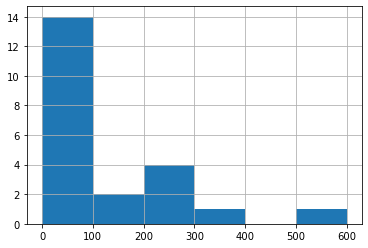

In [9]:
df1["Fatalities"].hist(bins = [0, 100, 200, 300, 400, 500, 600])
h1, c1 = np.histogram(df1["Fatalities"], bins = [0, 100, 200, 300, 400, 500, 600])


In [10]:
df2 = pd.DataFrame(set(zip(c1, h1)), columns = ["Col1", "Col2"])
print(df2)
df2.sort_values(df2.columns[0])

   Col1  Col2
0   500     1
1   200     4
2   400     0
3   100     2
4     0    14
5   300     1


,Col1,Col2
4,0,14
3,100,2
1,200,4
5,300,1
2,400,0
0,500,1


In [11]:
set(zip(df2["Col1"], df2["Col2"]))

{(0, 14), (100, 2), (200, 4), (300, 1), (400, 0), (500, 1)}

In [12]:
df1["Fatalities"].mean()

119.13636363636364

In [13]:
df1["Fatalities"].median()

44.5

In [14]:
df1["Fatalities"].std()

144.78499509684974

In [15]:
print(df1.to_latex(index = False, position = 'H'))

\begin{table}[H]
\centering
\begin{tabular}{rrrr}
\toprule
 Year &  Departures &  Accidents &  Fatalities \\
\midrule
 1985 &         6.1 &          4 &         197 \\
 1996 &         7.9 &          3 &         342 \\
 1986 &         6.4 &          2 &           5 \\
 1997 &         9.9 &          3 &           3 \\
 1987 &         6.6 &          4 &         231 \\
 1998 &        10.5 &          1 &           1 \\
 1988 &         6.7 &          3 &         285 \\
 1999 &        10.9 &          2 &          12 \\
 1989 &         6.6 &         11 &         278 \\
 2000 &        11.1 &          2 &          89 \\
 1990 &         7.8 &          6 &          39 \\
 2001 &        10.6 &          6 &         531 \\
 1991 &         7.5 &          4 &          62 \\
 2002 &        10.3 &          0 &           0 \\
 1992 &         7.5 &          4 &          33 \\
 2003 &        10.2 &          2 &          22 \\
 1993 &         7.7 &          1 &           1 \\
 2004 &        10.8 &          1

In [16]:
df3 = pd.read_csv('benford', delimiter = ' ')
print(df3)

   First_digit  Proportion_of_data
0            1               0.301
1            2               0.176
2            3               0.125
3            4               0.097
4            5               0.079
5            6               0.067
6            7               0.058
7            8               0.051
8            9               0.046


In [17]:
print(df3.to_latex(index = False, position = 'H'))

\begin{table}[H]
\centering
\begin{tabular}{rr}
\toprule
 First\_digit &  Proportion\_of\_data \\
\midrule
           1 &               0.301 \\
           2 &               0.176 \\
           3 &               0.125 \\
           4 &               0.097 \\
           5 &               0.079 \\
           6 &               0.067 \\
           7 &               0.058 \\
           8 &               0.051 \\
           9 &               0.046 \\
\bottomrule
\end{tabular}
\end{table}



In [18]:
print(*list(zip(df3['First_digit'],df3['Proportion_of_data'])))

(1, 0.301) (2, 0.176) (3, 0.125) (4, 0.097) (5, 0.079) (6, 0.067) (7, 0.058) (8, 0.051) (9, 0.046)


In [19]:
df4 = pd.read_csv('MaleFemaleAge', sep = ' |–', engine = 'python', header = None, names = ["StartAge", "EndAge",  "Males", "Females"])
print(df4)

    StartAge  EndAge  Males  Females
0          0       5    120       67
1          5      10    184      120
2         10      15     44       22
3         15      20     24       15
4         20      30     23       25
5         30      40     50       22
6         40      50     60       40
7         50      60    102       76
8         60      70    167      104
9         70      80    150       90
10        80     100     49       27


In [20]:
minVal = min(df4["EndAge"] - df4["StartAge"])
df4["MidAge"] = 0.5 * (df4["StartAge"] + df4["EndAge"])
print(df4)

    StartAge  EndAge  Males  Females  MidAge
0          0       5    120       67     2.5
1          5      10    184      120     7.5
2         10      15     44       22    12.5
3         15      20     24       15    17.5
4         20      30     23       25    25.0
5         30      40     50       22    35.0
6         40      50     60       40    45.0
7         50      60    102       76    55.0
8         60      70    167      104    65.0
9         70      80    150       90    75.0
10        80     100     49       27    90.0


In [21]:
meanMales = (df4["MidAge"] * df4["Males"])/(df4["Males"].sum())
print(meanMales.sum())
meanFeMales = (df4["MidAge"] * df4["Females"])/(df4["Females"].sum())
print(meanFeMales.sum())

40.90441932168551
40.98684210526316


In [22]:
print(df4.to_latex(index = False, position = 'H'))

\begin{table}[H]
\centering
\begin{tabular}{rrrrr}
\toprule
 StartAge &  EndAge &  Males &  Females &  MidAge \\
\midrule
        0 &       5 &    120 &       67 &     2.5 \\
        5 &      10 &    184 &      120 &     7.5 \\
       10 &      15 &     44 &       22 &    12.5 \\
       15 &      20 &     24 &       15 &    17.5 \\
       20 &      30 &     23 &       25 &    25.0 \\
       30 &      40 &     50 &       22 &    35.0 \\
       40 &      50 &     60 &       40 &    45.0 \\
       50 &      60 &    102 &       76 &    55.0 \\
       60 &      70 &    167 &      104 &    65.0 \\
       70 &      80 &    150 &       90 &    75.0 \\
       80 &     100 &     49 &       27 &    90.0 \\
\bottomrule
\end{tabular}
\end{table}



In [25]:
df4

,StartAge,EndAge,Males,Females,MidAge
0,0,5,120,67,2.5
1,5,10,184,120,7.5
2,10,15,44,22,12.5
3,15,20,24,15,17.5
4,20,30,23,25,25.0
5,30,40,50,22,35.0
6,40,50,60,40,45.0
7,50,60,102,76,55.0
8,60,70,167,104,65.0
9,70,80,150,90,75.0


In [49]:
df4["Males_cum"] = df4["Males"].cumsum()
df4["Females_cum"] = df4["Females"].cumsum()
print(0.5 * df4["Males"].sum())
df4

486.5


,StartAge,EndAge,Males,Females,MidAge,Males_weighted_sum,Males_cum,Females_cum
0,0,5,120,67,2.5,300.0,120,67
1,5,10,184,120,7.5,1680.0,304,187
2,10,15,44,22,12.5,2230.0,348,209
3,15,20,24,15,17.5,2650.0,372,224
4,20,30,23,25,25.0,3225.0,395,249
5,30,40,50,22,35.0,4975.0,445,271
6,40,50,60,40,45.0,7675.0,505,311
7,50,60,102,76,55.0,13285.0,607,387
8,60,70,167,104,65.0,24140.0,774,491
9,70,80,150,90,75.0,35390.0,924,581


In [43]:
print(0.25 * df4["Males"].sum())
5 + 5*((243.25 - 120) / (304 - 120))

243.25


8.349184782608695

In [45]:
print(0.5 * df4["Males"].sum())
40 + 10*((486.5 - 445) / (505 - 445))

486.5


46.916666666666664

In [47]:
print(0.75 * df4["Males"].sum())
60 + 10*((729.75 - 607) / (774 - 607))

729.75


67.3502994011976

In [50]:
print(0.25 * df4["Females"].sum())
5 + 5*((152 - 67) / (187 - 67))

152.0


8.541666666666668

In [52]:
print(0.5 * df4["Females"].sum())
40 + 10*((304 - 271) / (311 - 271))

304.0


48.25

In [54]:
print(0.75 * df4["Females"].sum())
60 + 10*((456 - 387) / (491 - 387))

456.0


66.63461538461539

In [55]:
s4 = pd.Series([9.2, 14.1, 9.8, 12.4, 16.0, 12.6, 22.7, 18.9, 21.0, 14.5, 20.4, 16.9])

In [56]:
s4.mean()

15.708333333333334

In [57]:
s4.std()

4.39534016334517

In [58]:
5*104 - (307)

213

In [59]:
64 + 5*104*104 - 102*102 - 10000 - 105*105

22715

In [63]:
coeffs1 = [2, -2*213, 213*213 -22715]
r1 = np.roots(coeffs1)
print(r1)

[110.40512484 102.59487516]


In [66]:
s5 = pd.read_csv('transistorLives.txt', header = None)
print(s5)

     0    1    2    3    4    5    6    7
0  112  121  126  108  141  104  136  134
1  121  118  143  116  108  122  127  140
2  113  117  126  130  134  120  131  133
3  118  125  151  147  137  140  132  119
4  110  124  132  152  135  130  136  128


In [76]:
s6 = pd.Series(s5.values.flatten())
s6.describe()

count     40.000000
mean     127.425000
std       11.873019
min      104.000000
25%      118.750000
50%      127.500000
75%      135.250000
max      152.000000
dtype: float64

In [88]:
a = s6.value_counts(bins = range(100, 165, 5))

In [97]:
b = a.sort_index()

In [117]:
c = list(set(zip(range(100, 165, 5), b.values.cumsum() / 40)))
c.sort()
print(*c)

(100, 0.025) (105, 0.1) (110, 0.15) (115, 0.3) (120, 0.425) (125, 0.575) (130, 0.75) (135, 0.875) (140, 0.925) (145, 0.95) (150, 1.0) (155, 1.0)


In [120]:
modeVal = np.max(b.values)
print(modeVal)
b

7


(99.999, 105.0]    1
(105.0, 110.0]     3
(110.0, 115.0]     2
(115.0, 120.0]     6
(120.0, 125.0]     5
(125.0, 130.0]     6
(130.0, 135.0]     7
(135.0, 140.0]     5
(140.0, 145.0]     2
(145.0, 150.0]     1
(150.0, 155.0]     2
(155.0, 160.0]     0
dtype: int64

In [122]:
s6 = pd.Series(

SyntaxError: invalid syntax (<ipython-input-122-0c0d79a355aa>, line 1)

In [168]:
s7 = pd.read_csv('Shrinkage.txt', header = None, sep = ' ')
s8 = pd.Series(s7.values.flatten())
print(s8.mean(), s8.median())
print(s8.std() ** 2)
int(17.45)
s8.describe()

18.977999999999998 19.3
6.252771428571429


count    50.000000
mean     18.978000
std       2.500554
min      13.400000
25%      17.525000
50%      19.300000
75%      20.575000
max      24.000000
dtype: float64

In [189]:
h7 = s8.value_counts(bins = range(13, 25))
h8 = h7.sort_index()
df9 = pd.DataFrame(h8, columns = ["Frequency"])

In [181]:
print(*list(zip(range(13, 25), h8.values)))

(13, 2) (14, 2) (15, 3) (16, 4) (17, 6) (18, 7) (19, 6) (20, 10) (21, 5) (22, 1) (23, 4)


In [198]:
df9["Midpoints"] = np.arange(13.5, 24, 1.0).tolist()
print(df9.to_latex(index = False, position = 'H', columns = ["Midpoints", "Frequency"]))

\begin{table}[H]
\centering
\begin{tabular}{rr}
\toprule
 Midpoints &  Frequency \\
\midrule
      13.5 &          2 \\
      14.5 &          2 \\
      15.5 &          3 \\
      16.5 &          4 \\
      17.5 &          6 \\
      18.5 &          7 \\
      19.5 &          6 \\
      20.5 &         10 \\
      21.5 &          5 \\
      22.5 &          1 \\
      23.5 &          4 \\
\bottomrule
\end{tabular}
\end{table}



In [200]:
meanVal9 = (df9["Midpoints"] * df9["Frequency"]) / (df9["Frequency"].sum())
print(meanVal9.sum())

18.979999999999997


In [202]:
df9["Frequency"].cumsum()

(12.999, 14.0]     2
(14.0, 15.0]       4
(15.0, 16.0]       7
(16.0, 17.0]      11
(17.0, 18.0]      17
(18.0, 19.0]      24
(19.0, 20.0]      30
(20.0, 21.0]      40
(21.0, 22.0]      45
(22.0, 23.0]      46
(23.0, 24.0]      50
Name: Frequency, dtype: int64

In [203]:
19 + 5/6

19.833333333333332

In [205]:
df9["StdDev"] = df9["Frequency"] * (df9["Midpoints"] - 18.98) * (df9["Midpoints"] - 18.98)
df9

,Frequency,Midpoints,StdDev
"(12.999, 14.0]",2,13.5,60.0608
"(14.0, 15.0]",2,14.5,40.1408
"(15.0, 16.0]",3,15.5,36.3312
"(16.0, 17.0]",4,16.5,24.6016
"(17.0, 18.0]",6,17.5,13.1424
"(18.0, 19.0]",7,18.5,1.6128
"(19.0, 20.0]",6,19.5,1.6224
"(20.0, 21.0]",10,20.5,23.1040
"(21.0, 22.0]",5,21.5,31.7520
"(22.0, 23.0]",1,22.5,12.3904


In [206]:
df9["StdDev"].sum() / 50

6.5296

In [2]:
df10 = pd.Series([3, 4, 7, 2, 9, 6])

In [4]:
df10.mean()

5.166666666666667

In [8]:
df10.std() ** 2

6.966666666666667

In [40]:
meanRec = df10.values[0]
stdRec = 0
for idx, val in enumerate(df10.values[1:]):
    updateVal = (val - meanRec)/(2 + idx)
    meanRec = meanRec + updateVal
    stdRec = ((1 - (1/(1 + idx))) * stdRec) + (2 + idx) * updateVal * updateVal

print(f"Mean recursive = {meanRec} and Variance recursive = {stdRec}")

Mean recursive = 5.166666666666667 and Variance recursive = 6.966666666666668


In [27]:
3 * 1.16*1.16 + (0.5  * 0.5 * 0.5)

4.1617999999999995

In [75]:
df11 = pd.read_csv('WeatherMonthly.txt', sep = ' ', engine = 'python', header = None, names = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'AnnualAvg'])
df11 = df11.apply(pd.to_numeric, errors='coerce')

45.99999999999999

In [76]:
df11["January"].quantile(0.9, interpolation = 'linear')

45.99999999999999

In [77]:
df11["July"].quantile(0.75, interpolation = 'linear')

70.45

In [93]:
s12 = pd.read_csv('DeathAges.txt', sep = ',', header = None).T
s12.describe()

,0
count,39.000000
mean,82.282051
std,10.755534
min,60.000000
25%,74.000000
50%,85.000000
75%,91.500000
max,98.000000


In [89]:
s12.describe(axis = 0)

TypeError: describe() got an unexpected keyword argument 'axis'

In [94]:
s13 = pd.Series([114, 114, 114, 113, 111, 97, 94, 66, 63, 52, 48, 33])
s13.describe()

count     12.000000
mean      84.916667
std       30.473411
min       33.000000
25%       60.250000
50%       95.500000
75%      113.250000
max      114.000000
dtype: float64

In [95]:
s13.std() ** 2

928.628787878788

In [127]:
s12 = pd.read_csv('particulates.txt', sep = ',', header = None).T
s12.columns = ["Concentrations"]

In [173]:
s13 = s12["Concentrations"].value_counts(bins = np.arange(0, 300, 20))
s14 = s13.sort_index()
s14

(-0.001, 20.0]    10
(20.0, 40.0]       9
(40.0, 60.0]       3
(60.0, 80.0]       5
(80.0, 100.0]      5
(100.0, 120.0]     2
(120.0, 140.0]     1
(140.0, 160.0]     0
(160.0, 180.0]     0
(180.0, 200.0]     0
(200.0, 220.0]     1
(220.0, 240.0]     0
(240.0, 260.0]     0
(260.0, 280.0]     0
Name: Concentrations, dtype: int64

In [174]:
c1 = list(set(zip(np.arange(0, 300, 20), s14.values)))
c1.sort()
print(*c1)

(0, 10) (20, 9) (40, 3) (60, 5) (80, 5) (100, 2) (120, 1) (140, 0) (160, 0) (180, 0) (200, 1) (220, 0) (240, 0) (260, 0)


In [165]:
s12.describe()

,Concentrations
count,36.000000
mean,51.722222
std,44.960688
min,5.000000
25%,17.750000
50%,35.000000
75%,80.250000
max,220.000000


In [180]:
a = [np.arange(0, 260, 40)]
print(a)

[array([  0,  40,  80, 120, 160, 200, 240])]


In [226]:
file1 = open('waterEvap.txt', 'r')
Lines1 = file1.readlines()

allnum = []
for idx, ln in enumerate(Lines1):
    currentNum = re.split(', |\n', ln)
    
    for j in currentNum:
        if j != '':
            allnum.append(idx * 0.1 + 0.01 * int(j))

In [231]:
n1 = np.array(allnum)
n1.round(decimals = 2)
s14 = pd.Series(n1)
s14.mean()

0.3476363636363635

In [232]:
s14.describe()

count    55.000000
mean      0.347636
std       0.117630
min       0.020000
25%       0.275000
50%       0.350000
75%       0.440000
max       0.560000
dtype: float64

In [247]:
s15 = s14.value_counts(bins = np.arange(0, 0.70, 0.1))
s16 = s15.sort_index()
s16

(-0.001, 0.1]     2
(0.1, 0.2]        2
(0.2, 0.3]       13
(0.3, 0.4]       18
(0.4, 0.5]       17
(0.5, 0.6]        3
dtype: int64

<AxesSubplot:>

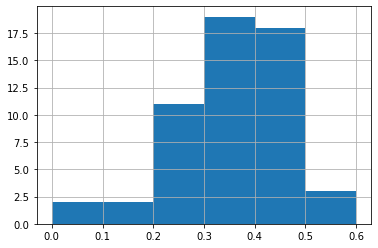

In [257]:
s14.hist(bins = np.arange(0, 0.70, 0.1))

In [262]:
c1 = list(set(zip(np.arange(0, 0.6, 0.1), s16.values)))
c1.sort()
print(*c1)

(0.0, 2) (0.1, 2) (0.2, 13) (0.30000000000000004, 18) (0.4, 17) (0.5, 3)


In [296]:
s14[(s14 < s14.mean() + s14.std()) & (s14 > s14.mean() - s14.std())]

9     0.24
10    0.25
11    0.25
12    0.25
13    0.26
14    0.29
15    0.30
16    0.30
17    0.32
18    0.32
19    0.32
20    0.33
21    0.33
22    0.33
23    0.33
24    0.34
25    0.34
26    0.35
27    0.35
28    0.35
29    0.36
30    0.36
31    0.37
32    0.38
33    0.39
34    0.40
35    0.41
36    0.42
37    0.42
38    0.42
39    0.43
40    0.44
41    0.44
42    0.44
43    0.45
44    0.45
45    0.45
dtype: float64

In [268]:
len(s14[s14 < s14.mean() - s14.std()])

9

In [282]:
37/55

0.6727272727272727

In [301]:
s20 = pd.read_csv('gpas.txt', sep = ',', header = None).T
s20.columns = ["GPAS"]
s20

,GPAS
0,3.46
1,3.72
2,3.95
3,3.55
4,3.62
5,3.80
6,3.86
7,3.71
8,3.56
9,3.49


In [305]:
s21 = pd.Series(s20["GPAS"])
s21

0     3.46
1     3.72
2     3.95
3     3.55
4     3.62
5     3.80
6     3.86
7     3.71
8     3.56
9     3.49
10    3.96
11    3.90
12    3.70
13    3.61
14    3.72
15    3.65
16    3.48
17    3.87
18    3.82
19    3.91
20    3.69
21    3.67
22    3.72
23    3.66
24    3.79
25    3.75
26    3.93
27    3.74
28    3.50
29    3.83
Name: GPAS, dtype: float64

In [310]:
lowLim = s21.mean() - 1.5 * s21.std()
upLim = s21.mean() + 1.5 * s21.std()
len(s21[(s21 < upLim) & (s21 > lowLim)]) / len(s21)


0.8

In [318]:
lowLim1 = s21.mean() - 2 * s21.std()
print(lowLim1)
upLim1 = s21.mean() + 2 * s21.std()
print(upLim1)
len(s21[(s21 < upLim1) & (s21 > lowLim1)]) / len(s21)
s21

3.4293233648040187
4.0120099685293145


0     3.46
1     3.72
2     3.95
3     3.55
4     3.62
5     3.80
6     3.86
7     3.71
8     3.56
9     3.49
10    3.96
11    3.90
12    3.70
13    3.61
14    3.72
15    3.65
16    3.48
17    3.87
18    3.82
19    3.91
20    3.69
21    3.67
22    3.72
23    3.66
24    3.79
25    3.75
26    3.93
27    3.74
28    3.50
29    3.83
Name: GPAS, dtype: float64

In [353]:
s22 = s21.value_counts(bins = np.arange(3.4, 4.05, 0.05))
s23 = s22.sort_index()
print(s23)

(3.399, 3.45]    0
(3.45, 3.5]      3
(3.5, 3.55]      1
(3.55, 3.6]      2
(3.6, 3.65]      2
(3.65, 3.7]      4
(3.7, 3.75]      6
(3.75, 3.8]      2
(3.8, 3.85]      3
(3.85, 3.9]      2
(3.9, 3.95]      3
(3.95, 4.0]      2
Name: GPAS, dtype: int64


In [346]:
r4 = np.arange(3.4, 4.05, 0.05)
r4.tolist()
np.round(r4, 2).tolist()
c4 = list(zip(r4, s23.values))
print(*c4)

(3.4, 0) (3.4499999999999997, 3) (3.4999999999999996, 1) (3.5499999999999994, 2) (3.599999999999999, 2) (3.649999999999999, 4) (3.699999999999999, 6) (3.7499999999999987, 2) (3.7999999999999985, 3) (3.8499999999999983, 2) (3.899999999999998, 3) (3.949999999999998, 2)


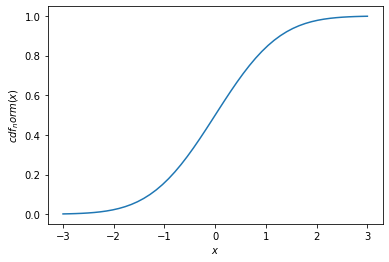

In [366]:
a = stats.norm.cdf(0, loc = 0, scale = 1)
print(a)

0.5


In [375]:
100* (1 - 2*stats.norm.sf(abs(1.5)))

86.63855974622838

In [376]:
s25 = pd.read_csv('transistorLives.txt', header = None)
s26 = pd.Series(s25.values.flatten())
s26.describe()

count     40.000000
mean     127.425000
std       11.873019
min      104.000000
25%      118.750000
50%      127.500000
75%      135.250000
max      152.000000
dtype: float64

In [380]:
r5 = np.arange(100, 160, 5)
s27 = s26.value_counts(bins = r5)
s28 = s27.sort_index()
s28

(99.999, 105.0]    1
(105.0, 110.0]     3
(110.0, 115.0]     2
(115.0, 120.0]     6
(120.0, 125.0]     5
(125.0, 130.0]     6
(130.0, 135.0]     7
(135.0, 140.0]     5
(140.0, 145.0]     2
(145.0, 150.0]     1
(150.0, 155.0]     2
dtype: int64

In [381]:
c5 = list(zip(r5, s28.values))
print(*c5)

(100, 1) (105, 3) (110, 2) (115, 6) (120, 5) (125, 6) (130, 7) (135, 5) (140, 2) (145, 1) (150, 2)


In [382]:
lowLim2 = s26.mean() - 1.5 * s26.std()
print(lowLim2)
upLim2 = s26.mean() + 1.5 * s26.std()
print(upLim2)
len(s26[(s26 < upLim2) & (s26 > lowLim2)]) / len(s26)

109.61547089552683
145.23452910447315


0.85

In [383]:
df29 = pd.read_csv('SalaryvsHeight.txt', sep = ' ', engine = 'python', header = None, names = ['Height', 'Salary'])

<AxesSubplot:xlabel='Height', ylabel='Salary'>

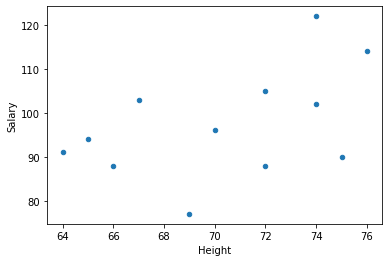

In [387]:
df29.plot.scatter(x = 'Height', y = 'Salary')


(64, 91) (65, 94) (66, 88) (67, 103) (69, 77) (70, 96) (72, 105) (72, 88) (74, 122) (74, 102) (75, 90) (76, 114)


In [392]:
df29['Salary'].corr(df29["Height"], method = 'pearson')

0.4838458705291898

In [394]:
df30 = pd.read_csv('studyHours.txt', sep = ' ', engine = 'python', header = None, names = ['Hours', 'GPA'])
df30["Hours"].corr(df30["GPA"])

0.7428881774899726

In [421]:
df31 = pd.DataFrame(np.sort(np.array([0, 25,32,60,40,38,50])), columns = ["Incomes"])
df31["Income_cumu"] = df31["Incomes"].cumsum()
df31["Lorenz Val"] = (df31["Income_cumu"] / df31["Incomes"].sum()).round(2)
df31["Eq_line"] = (np.arange(0, len(df31.index)) / (len(df31.index) - 1)).round(2)
df31

,Incomes,Income_cumu,Lorenz Val,Eq_line
0,0,0,0.00,0.00
1,25,25,0.10,0.17
2,32,57,0.23,0.33
3,38,95,0.39,0.50
4,40,135,0.55,0.67
5,50,185,0.76,0.83
6,60,245,1.00,1.00


In [422]:
c7 = list(zip(df31["Eq_line"], df31["Lorenz Val"]))
print(*c7)

(0.0, 0.0) (0.17, 0.1) (0.33, 0.23) (0.5, 0.39) (0.67, 0.55) (0.83, 0.76) (1.0, 1.0)


In [425]:
1 - 2 * np.trapz(df31["Lorenz Val"], dx = (1/6))

0.15666666666666662

In [440]:
df32 = pd.read_csv('gini_income.txt', sep = ' ', engine = 'python', header = None, names = ['Income', 'Frequency'])

allIncomes = np.array([])
a32 = np.array(list(zip(df32["Income"], df32["Frequency"])))
a33 = np.repeat(a32[:, 0], a32[:, 1])
print(a33)

[ 30  30  50  50  50  50  60  60  60  60  60  90  90  90  90 100 100 100
 120 120]


In [442]:
df32 = pd.DataFrame(a33, columns = ["Incomes1"])
df32["Income_cumu1"] = df32["Incomes1"].cumsum()
df32["Lorenz Val1"] = (df32["Income_cumu1"] / df32["Incomes1"].sum()).round(2)
df32["Eq_line1"] = (np.arange(0, len(df32.index)) / (len(df32.index) - 1)).round(2)
df32

,Incomes1,Income_cumu1,Lorenz Val1,Eq_line1
0,30,30,0.02,0.00
1,30,60,0.04,0.05
2,50,110,0.08,0.11
3,50,160,0.11,0.16
4,50,210,0.14,0.21
5,50,260,0.18,0.26
6,60,320,0.22,0.32
7,60,380,0.26,0.37
8,60,440,0.30,0.42
9,60,500,0.34,0.47


In [443]:
c8 = list(zip(df32["Eq_line1"], df32["Lorenz Val1"]))
print(*c8)

(0.0, 0.02) (0.05, 0.04) (0.11, 0.08) (0.16, 0.11) (0.21, 0.14) (0.26, 0.18) (0.32, 0.22) (0.37, 0.26) (0.42, 0.3) (0.47, 0.34) (0.53, 0.38) (0.58, 0.45) (0.63, 0.51) (0.68, 0.57) (0.74, 0.63) (0.79, 0.7) (0.84, 0.77) (0.89, 0.84) (0.95, 0.92) (1.0, 1.0)


In [445]:
1 - 2 * np.trapz(df32["Lorenz Val1"], dx = (1/19))

0.16315789473684217